# Exploratory Data Analysis (EDA)

**L'objectif** de ce projet est de mener une analyse exploratoire des données sur un ensemble de données provenant d'une société spécialisée dans les services de cartographie et de navigation en temps réel.

**Le but** est d'explorer l'ensemble de données et d'ajouter des visualisations pertinentes qui aident à communiquer l'histoire que les données racontent.

Ce mini-projet comporte 3 parties :

**Partie 1** : Exploration des données

* Nettoyage des données

**Partie 2** : Construire des visualisations

**Partie 3** : Évaluation et partage des résultats

In [1]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import numpy as np

In [2]:
data = pd.read_csv('EDA_dataset.csv')
data.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [3]:
data.size

194987

In [4]:
data.shape

(14999, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,14999.0,7499.000000,4329.982679,0.000000,3749.500000,7499.000000,11248.500000,14998.000000
sessions,14999.0,80.633776,80.699065,0.000000,23.000000,56.000000,112.000000,743.000000
drives,14999.0,67.281152,65.913872,0.000000,20.000000,48.000000,93.000000,596.000000
total_sessions,14999.0,189.964447,136.405128,0.220211,90.661156,159.568115,254.192341,1216.154633
n_days_after_onboarding,14999.0,1749.837789,1008.513876,4.000000,878.000000,1741.000000,2623.500000,3500.000000
total_navigations_fav1,14999.0,121.605974,148.121544,0.000000,9.000000,71.000000,178.000000,1236.000000
total_navigations_fav2,14999.0,29.672512,45.394651,0.000000,0.000000,9.000000,43.000000,415.000000
driven_km_drives,14999.0,4039.340921,2502.149334,60.441250,2212.600607,3493.858085,5289.861262,21183.401890
duration_minutes_drives,14999.0,1860.976012,1446.702288,18.282082,835.996260,1478.249859,2464.362632,15851.727160
activity_days,14999.0,15.537102,9.004655,0.000000,8.000000,16.000000,23.000000,31.000000


In [7]:
data.isna().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

In [3]:
data = data.dropna()
data.shape

(14299, 13)

In [9]:
data[data.duplicated()]

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device


In [10]:
data[data.duplicated(subset='ID')]

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,14299.0,7503.573117,4331.207621,0.000000,3749.500000,7504.000000,11257.500000,14998.000000
sessions,14299.0,80.623820,80.736502,0.000000,23.000000,56.000000,111.000000,743.000000
drives,14299.0,67.255822,65.947295,0.000000,20.000000,48.000000,93.000000,596.000000
total_sessions,14299.0,189.547409,136.189764,0.220211,90.457733,158.718571,253.540450,1216.154633
n_days_after_onboarding,14299.0,1751.822505,1008.663834,4.000000,878.500000,1749.000000,2627.500000,3500.000000
total_navigations_fav1,14299.0,121.747395,147.713428,0.000000,10.000000,71.000000,178.000000,1236.000000
total_navigations_fav2,14299.0,29.638296,45.350890,0.000000,0.000000,9.000000,43.000000,415.000000
driven_km_drives,14299.0,4044.401535,2504.977970,60.441250,2217.319909,3496.545617,5299.972162,21183.401890
duration_minutes_drives,14299.0,1864.199794,1448.005047,18.282082,840.181344,1479.394387,2466.928876,15851.727160
activity_days,14299.0,15.544653,9.016088,0.000000,8.000000,16.000000,23.000000,31.000000


## Visualization

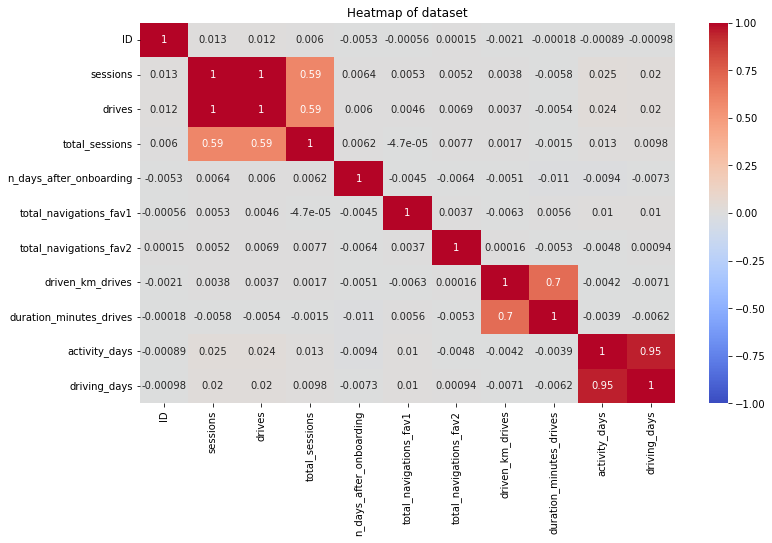

In [4]:
plt.figure(figsize=(12,7))
sns.heatmap(data = data.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Heatmap of dataset')
plt.show()

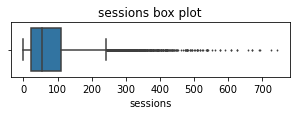

In [13]:
plt.figure(figsize=(5,1))
sns.boxplot(x=data['sessions'], fliersize=1)
plt.title('sessions box plot');

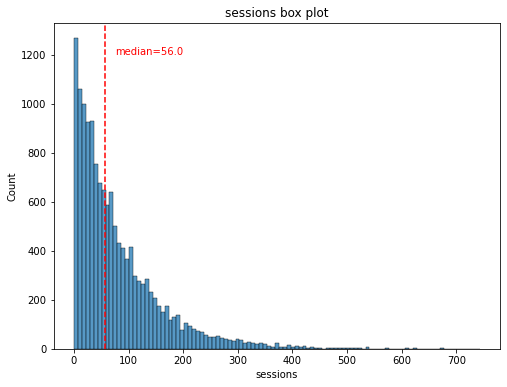

In [14]:
plt.figure(figsize=(8,6))
sns.histplot(x=data['sessions'])
median = data['sessions'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(75,1200, 'median=56.0', color='red')
plt.title('sessions box plot');

La variable `sessions` est une distribution right-skewed, la moitié des observations ayant 56 sessions ou moins. Cependant, comme l'indique le boxplot, certains utilisateurs ont plus de 700 sessions.

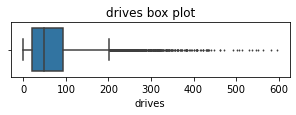

In [15]:
plt.figure(figsize=(5,1))
sns.boxplot(x=data['drives'], fliersize=1)
plt.title('drives box plot');

In [16]:
def histogrammer(column_str, median_text=True, **kwargs): 
                                                           
    median=round(data[column_str].median(), 1)
    plt.figure(figsize=(8,6))
    ax = sns.histplot(x=data[column_str], **kwargs)            
    plt.axvline(median, color='red', linestyle='--')         
    if median_text==True:                                    
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');

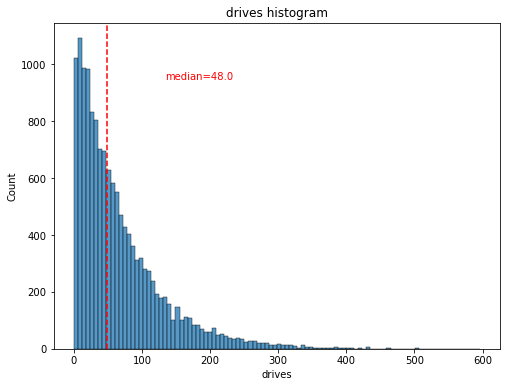

In [17]:
histogrammer('drives')

Les informations sur les trajets suivent une distribution similaire à celle de la variable "sessions", avec une courbe à droite, approximativement log-normale, et une médiane de 48. Toutefois, certains conducteurs ont effectué plus de 400 trajets au cours du dernier mois.

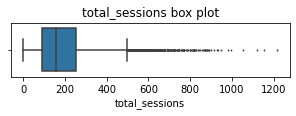

In [18]:
plt.figure(figsize=(5,1))
sns.boxplot(x=data['total_sessions'], fliersize=1)
plt.title('total_sessions box plot');

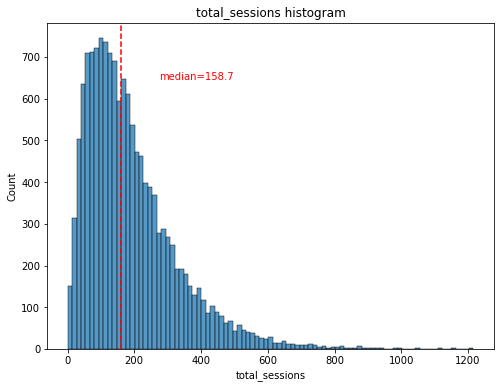

In [19]:
histogrammer('total_sessions')

Le "total_sessions" est une distribution right-skewed. La médiane du nombre total de sessions est de 158,7. Cette information est intéressante car, si le nombre médian de sessions au cours du dernier mois était de 48 et que le nombre médian total de sessions était de ~159, il semble qu'une grande partie du nombre total de lecteurs d'un utilisateur ait eu lieu au cours du dernier mois.

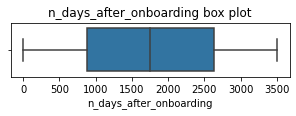

In [20]:
plt.figure(figsize=(5,1))
sns.boxplot(x=data['n_days_after_onboarding'], fliersize=1)
plt.title('n_days_after_onboarding box plot');

Median: 1749.0


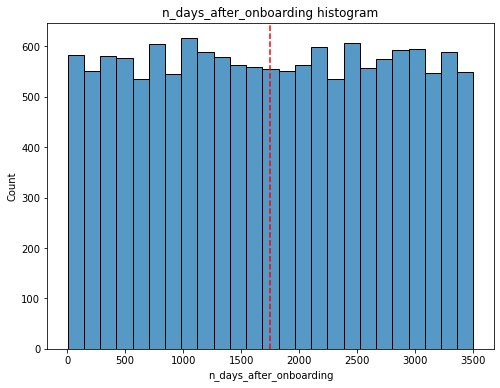

In [21]:
histogrammer('n_days_after_onboarding', median_text=False)

La durée totale d'utilisation (nombre de jours depuis l'intégration) est une distribution uniforme avec des valeurs allant de presque zéro à ~ 3 500 (~ 9,5 ans).

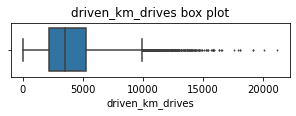

In [22]:
plt.figure(figsize=(5,1))
sns.boxplot(x=data['driven_km_drives'], fliersize=1)
plt.title('driven_km_drives box plot');

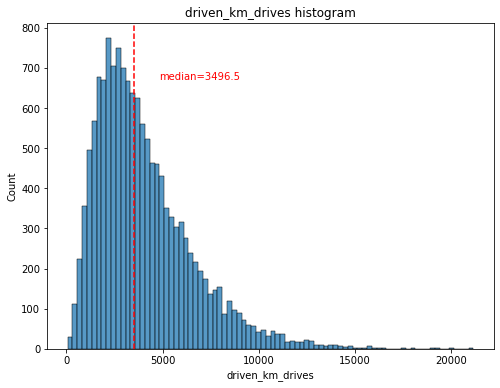

In [23]:
histogrammer('driven_km_drives')

Le nombre de kilomètres parcourus au cours du dernier mois par chaque utilisateur présente une distribution right-skewed, la moitié des utilisateurs parcourant moins de 3 495 kilomètres.

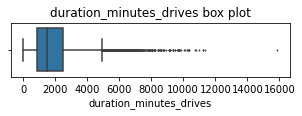

In [24]:
plt.figure(figsize=(5,1))
sns.boxplot(x=data['duration_minutes_drives'], fliersize=1)
plt.title('duration_minutes_drives box plot');

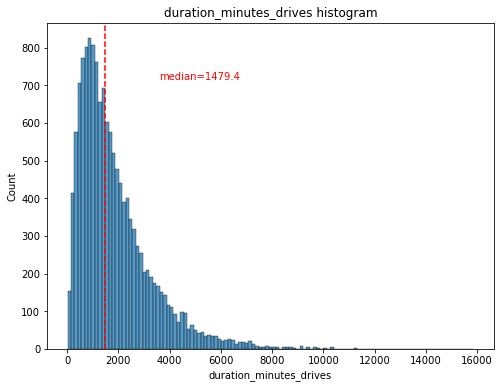

In [25]:
histogrammer('duration_minutes_drives')

La variable duration_minutes_drives a une queue droite très asymétrique. La moitié des utilisateurs ont conduit moins de ~ 1 478 minutes (~ 25 heures), mais certains utilisateurs ont conduit plus de 250 heures au cours du mois.

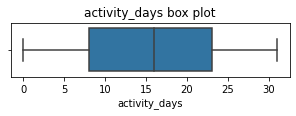

In [26]:
plt.figure(figsize=(5,1))
sns.boxplot(x=data['activity_days'], fliersize=1)
plt.title('activity_days box plot');

Median: 16.0


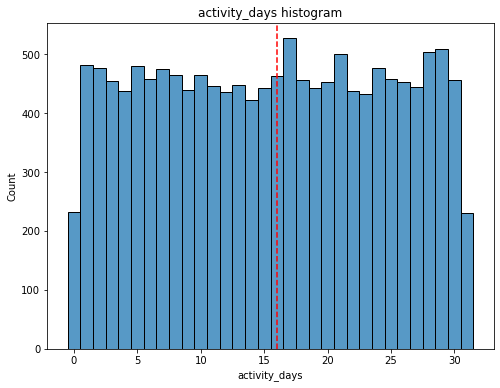

In [27]:
histogrammer('activity_days', median_text=False, discrete=True)

Au cours du dernier mois, les utilisateurs ont ouvert l'application en moyenne 16 fois. Le diagramme en boîte révèle une distribution centrée. L'histogramme montre une distribution presque uniforme d'environ 500 personnes ayant ouvert l'application pour chaque nombre de jours. Toutefois, environ 250 personnes n'ont pas ouvert l'application du tout et 250 personnes l'ont ouverte tous les jours du mois.

Cette distribution est remarquable car elle ne reflète pas la distribution des sessions, qui serait étroitement corrélée avec le nombre de jours d'activité.

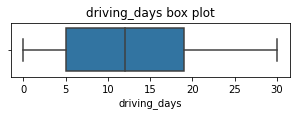

In [28]:
plt.figure(figsize=(5,1))
sns.boxplot(x=data['driving_days'], fliersize=1)
plt.title('driving_days box plot');

Median: 12.0


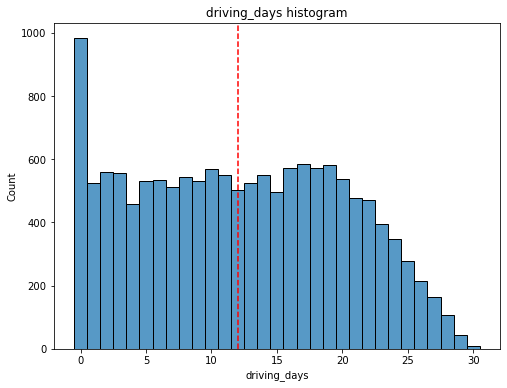

In [29]:
histogrammer('driving_days', median_text=False, discrete=True)

Le nombre de jours où les utilisateurs ont conduit chaque mois est presque uniforme, et il est largement corrélé avec le nombre de jours où ils ont ouvert l'application ce mois-là, à l'exception de la distribution des jours de conduite qui s'interrompt à droite.

Cependant, il y a presque deux fois plus d'utilisateurs (~1 000 contre ~550) qui n'ont pas conduit du tout pendant le mois. Cela peut sembler contre-intuitif si l'on tient compte des informations fournies par la variable activity_days. Cette variable indique que ~500 utilisateurs ont ouvert l'application chaque jour, mais il n'y a que ~250 utilisateurs qui n'ont pas ouvert l'application du tout au cours du mois et ~250 utilisateurs qui ont ouvert l'application tous les jours.

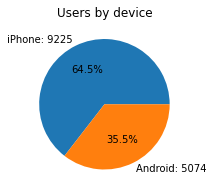

In [30]:
# Pie chart
fig = plt.figure(figsize=(3,3))
data1=data['device'].value_counts()
plt.pie(data1,
        labels=[f'{data1.index[0]}: {data1.values[0]}',
                f'{data1.index[1]}: {data1.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Users by device');

Il y a presque deux fois plus d'utilisateurs d'iPhone que d'utilisateurs d'Android représentés dans ces données

In [31]:
data.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


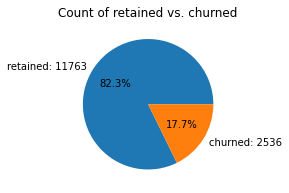

In [32]:
fig = plt.figure(figsize=(3,3))
data1=data['label'].value_counts()
plt.pie(data1,
        labels=[f'{data1.index[0]}: {data1.values[0]}',
                f'{data1.index[1]}: {data1.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Count of retained vs. churned');

Moins de 18 % des utilisateurs ont abandonné.

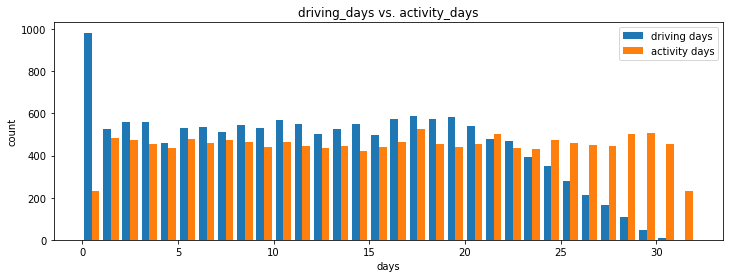

In [33]:
plt.figure(figsize=(12,4))
label=['driving days', 'activity days']
plt.hist([data['driving_days'], data['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

Comme nous l'avons vu précédemment, cela peut sembler contre-intuitif. Après tout, pourquoi y a-t-il moins de personnes qui n'ont pas du tout utilisé l'application au cours du mois et plus de personnes qui n'ont pas du tout conduit au cours du mois ?

D'un autre côté, cela pourrait simplement illustrer le fait que, bien que ces variables soient liées l'une à l'autre, elles ne sont pas identiques. Les gens ouvrent probablement plus souvent l'application qu'ils ne l'utilisent pour conduire - peut-être pour vérifier les temps de parcours ou les informations sur les itinéraires, pour mettre à jour les paramètres, ou même simplement par erreur.

Néanmoins, il peut être utile de contacter l'équipe chargée des données chez Waze pour obtenir plus d'informations à ce sujet, notamment parce qu'il semble que le nombre de jours dans le mois ne soit pas le même d'une variable à l'autre.

à confirmer le nombre maximum de jours pour chaque variable - driving_days et activity_days.

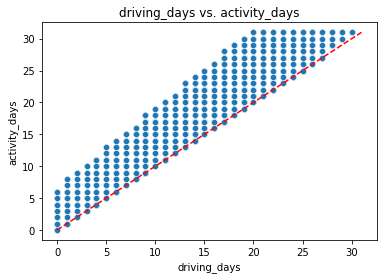

In [34]:
sns.scatterplot(data=data, x='driving_days', y='activity_days')
plt.title('driving_days vs. activity_days')
plt.plot([0,31], [0,31], color='red', linestyle='--');

nous remarquons qu'il existe une limite théorique. Si nous utilisons l'application pour conduire, alors, par définition, cela doit également compter comme une utilisation journalière. En d'autres termes, il ne peut y avoir plus de jours de conduite que de jours d'activité. Aucun des échantillons de ces données n'enfreint cette règle, ce qui est une bonne chose.

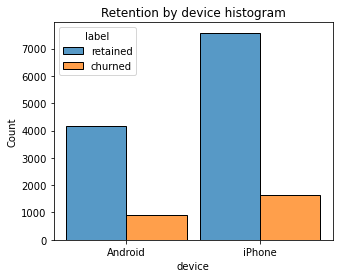

In [35]:
plt.figure(figsize=(5,4))
sns.histplot(data=data,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Retention by device histogram');

La proportion d'utilisateurs quittant l'entreprise par rapport aux utilisateurs restant est la même pour tous les types d'appareils.

#### Retention by kilometers driven per driving day

In [36]:
data['km_per_driving_day'] = data['driven_km_drives'] / data['driving_days']

# 2. Call `describe()` on the new column
data['km_per_driving_day'].describe()

count    1.429900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.675616e+02
50%      3.241789e+02
75%      7.608293e+02
max               inf
Name: km_per_driving_day, dtype: float64

C'est le résultat de la présence de valeurs nulles dans la colonne driving_days. 

In [37]:
data.loc[data['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
data['km_per_driving_day'].describe()

count    14299.000000
mean       581.942399
std       1038.254509
min          0.000000
25%        136.168003
50%        273.301012
75%        558.018761
max      15420.234110
Name: km_per_driving_day, dtype: float64

La valeur maximale est de 15 420 kilomètres par jour de conduite. Ce chiffre est physiquement impossible à atteindre. Conduire à 100 km/h pendant 12 heures représente 1 200 km. Il est peu probable que de nombreuses personnes aient fait une moyenne supérieure à ce chiffre chaque jour de conduite. Par conséquent, pour l'instant, nous ne tenons pas compte des lignes où la distance indiquée dans cette colonne est supérieure à 1 200 km.

Tracer un histogramme de la nouvelle colonne km_par_jour_de_conduite, en ignorant les utilisateurs dont les valeurs sont supérieures à 1 200 km. Chaque barre doit être de la même longueur et avoir deux couleurs, l'une représentant le pourcentage d'utilisateurs de cette barre qui ont changé et l'autre représentant le pourcentage d'utilisateurs qui ont été retenus. 

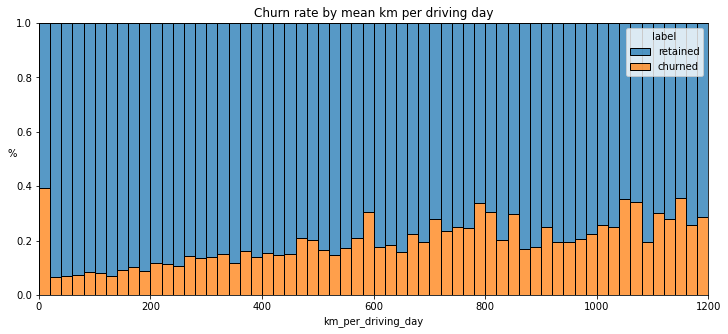

In [38]:
plt.figure(figsize=(12,5))
sns.histplot(data=data,
             x='km_per_driving_day',
             bins=range(0,1201,20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by mean km per driving day');

Le taux de désabonnement tend à augmenter à mesure que la distance moyenne parcourue quotidiennement augmente. Il serait intéressant d'étudier plus en détail les raisons pour lesquelles les utilisateurs de longues distances cessent d'utiliser l'application.

#### Churn rate per number of driving days

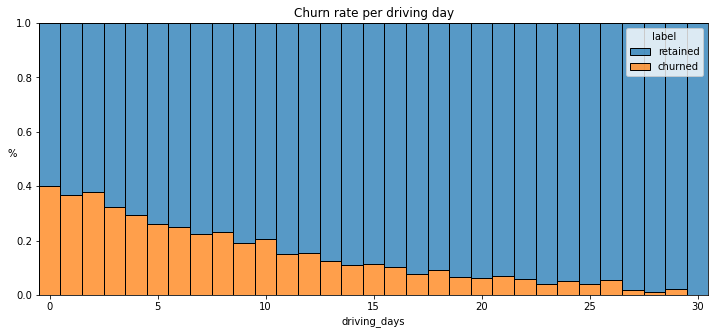

In [39]:
plt.figure(figsize=(12,5))
sns.histplot(data=data,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving day');

Le taux de désabonnement est le plus élevé chez les personnes qui n'ont pas beaucoup utilisé Waze au cours du mois précédent. Plus ils ont utilisé l'application, moins ils sont susceptibles de la quitter. Alors que 40 % des utilisateurs qui n'ont pas du tout utilisé l'application le mois dernier l'ont quittée, aucun utilisateur ayant utilisé l'application pendant 30 jours ne l'a quittée.

Cela n'est pas surprenant. Si les personnes qui utilisent beaucoup l'application la quittent, c'est probablement qu'elles ne sont pas satisfaites. Lorsque les personnes qui n'utilisent pas l'application la quittent, cela peut être le résultat d'une insatisfaction dans le passé, ou cela peut indiquer un besoin moindre d'une application de navigation. Peut-être ont-ils déménagé dans une ville dotée de bons transports publics et n'ont-ils plus besoin de conduire ?

#### Proportion of sessions that occurred in the last month

Créer une nouvelle colonne "percent_sessions_in_last_month" qui représente le pourcentage des sessions totales de chaque utilisateur qui ont été enregistrées au cours de leur dernier mois d'utilisation.

In [40]:
data['percent_sessions_in_last_month'] = data['sessions'] / data['total_sessions']

In [41]:
data['percent_sessions_in_last_month'].median()

0.4243102549137284

Median: 0.4


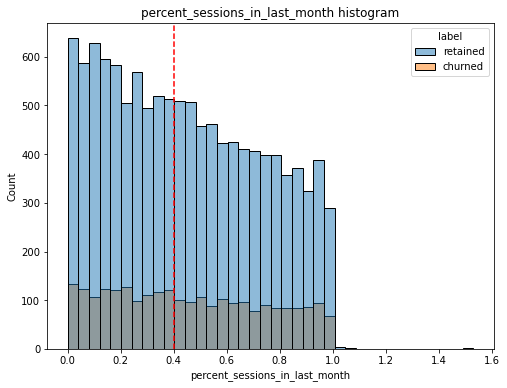

In [42]:
histogrammer('percent_sessions_in_last_month',
             hue=data['label'],
             multiple='layer',
             median_text=False)

In [43]:
data['n_days_after_onboarding'].median()

1749.0

La moitié des personnes figurant dans l'ensemble de données ont effectué 40 % ou plus de leurs sessions au cours du dernier mois, alors que la durée médiane globale depuis l'intégration est de près de cinq ans.

Créer un histogramme de "n_days_after_onboarding" pour les personnes dont 40 % ou plus des sessions totales ont eu lieu au cours du dernier mois.

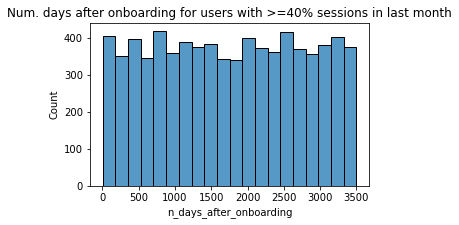

In [44]:
data1 = data.loc[data['percent_sessions_in_last_month']>=0.4]
plt.figure(figsize=(5,3))
sns.histplot(x=data1['n_days_after_onboarding'])
plt.title('Num. days after onboarding for users with >=40% sessions in last month');

Le nombre de jours écoulés depuis l'intégration des utilisateurs dont 40 % ou plus des sessions totales ont eu lieu au cours du dernier mois est une distribution uniforme. C'est très étrange. Il convient de demander pourquoi tant d'utilisateurs de longue date ont soudainement utilisé l'application de manière aussi intensive au cours du dernier mois.

### Handling outliers

In [45]:
def outlier_imputer(column_name, percentile):
    # Calculate threshold
    threshold = data[column_name].quantile(percentile)
    data.loc[data[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

In [46]:
for column in ['sessions', 'drives', 'total_sessions',
               'driven_km_drives', 'duration_minutes_drives']:
               outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 200.0
           total_sessions | percentile: 0.95 | threshold: 455.4394923899998
         driven_km_drives | percentile: 0.95 | threshold: 8898.716274999999
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.180091799999


In [47]:
data.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,76.539688,63.964683,183.717304,1751.822505,121.747395,29.638296,3944.558631,1792.911210,15.544653,12.182530,581.942399,0.449837
std,4331.207621,67.243178,55.127927,118.720520,1008.663834,147.713428,45.350890,2218.358258,1224.329759,9.016088,7.833835,1038.254509,0.286863
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003,0.196890
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012,0.424310
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,558.018761,0.687251
max,14998.000000,243.000000,200.000000,455.439492,3500.000000,1236.000000,415.000000,8898.716275,4668.180092,31.000000,30.000000,15420.234110,1.530637


L'analyse a révélé que le taux de désabonnement global est d'environ 17 %, et que ce taux est le même pour les utilisateurs d'iPhone et les utilisateurs d'Android.

En outre, l'EDA a révélé que les utilisateurs qui parcourent de très longues distances pendant leurs jours de conduite sont plus susceptibles de se désabonner, alors que les utilisateurs qui conduisent plus souvent sont moins susceptibles de se désabonner.

## Conclusion

* La presque totalité des variables ont été soit très fortement asymétriques, soit distribuées de manière uniforme. Pour les distributions à angle droit, cela signifie que la plupart des utilisateurs avaient des valeurs situées dans la partie inférieure de la plage pour cette variable. Pour les distributions uniformes, cela signifie que les utilisateurs avaient généralement la même probabilité d'avoir des valeurs situées à l'intérieur de l'intervalle de cette variable.

* La plupart des données ne posaient pas de problème et rien n'indiquait qu'une seule variable était complètement erronée. Cependant, plusieurs variables présentaient des valeurs aberrantes très improbables, voire impossibles, telles que driven_km_drives. Certaines variables mensuelles pourraient également poser problème, comme activity_days et driving_days, car l'une a une valeur maximale de 31 alors que l'autre a une valeur maximale de 30, ce qui indique que la collecte des données n'a peut-être pas eu lieu au cours du même mois pour ces deux variables.

* Moins de 18% des utilisateurs ont abandonné, et ~82% ont été restés.

* La distance parcourue par jour de conduite a une corrélation positive avec le désabonnement des utilisateurs. Plus un utilisateur parcourt de kilomètres par jour de conduite, plus il est susceptible de quitter son véhicule. D'autre part, le nombre de jours de conduite a une corrélation négative avec le désabonnement. Les utilisateurs qui ont conduit plus de jours au cours du dernier mois étaient moins susceptibles de changer de véhicule.

* Les utilisateurs, quelle que soit leur ancienneté (de tout nouveau à environ 10 ans), sont représentés de manière relativement homogène dans les données. Ceci est confirmé par l'histogramme pour n_days_after_onboarding, qui révèle une distribution uniforme pour cette variable.
